# ADS500B Final Project
# Kevin Baum & Vivian Do

In [ ]:
# Importing the following packages for use in the project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.api as sm
import statistics as stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
!pip install geopandas
import geopandas as gpd
from shapely.geometry import Point, Polygon
import fiona

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Reading in the csv file using pandas and the read_csv function. 
# File type is a comma separated values file.
df = pd.read_csv('house_sales.csv')

In [ ]:
print(df)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0       3.0       1.00   
1      6414100192  20141209T000000  538000.0       3.0       2.25   
2      5631500400  20150225T000000  180000.0       2.0       1.00   
3      2487200875  20141209T000000  604000.0       4.0       3.00   
4      1954400510  20150218T000000  510000.0       3.0       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0       3.0       2.50   
21609  6600060120  20150223T000000  400000.0       4.0       2.50   
21610  1523300141  20140623T000000  402101.0       2.0       0.75   
21611   291310100  20150116T000000  400000.0       3.0       2.50   
21612  1523300157  20141015T000000  325000.0       2.0       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0           1180.0    5650.0     1.0           0     0  ...      7   
1           2570.0    7242.0   

In [ ]:
#Dimensions
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 21613
Number of columns: 21


In [ ]:
#List of all field labels
list(df.columns)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [ ]:
#Data types
df.dtypes

id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
df.drop_duplicates(subset ='id',
                     keep = False, inplace = True)

In [ ]:
#Show all null values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms         1116
bathrooms        1054
sqft_living      1085
sqft_lot         1023
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [ ]:
#Fill in null values for sqft_living and sqft_lot

#sqft_living imputed from the sum of sqft_above + sqft_basement
df['sqft_living'].fillna((df['sqft_above']+df['sqft_basement']), inplace=True)

#sqft_lot15 used to impute missing sqft_lot values
df['sqft_lot'].fillna(df['sqft_lot15'], inplace=True)

In [ ]:
# Starting the process of filling in null values for bedrooms and bathrooms

#convert sqft_living into categorical values
category=pd.cut(df['sqft_living'],bins=[0,1500,3000,4500,14000],labels=['Small','Medium','Large','Extra-Large']) 

#1500, 3000, 4500, 8000 represent the upper bounds for each category

In [ ]:
#insert sqft_living categories into a new column labeled 'house size'
df.insert(6,'house_size', category)
df

,id,date,price,bedrooms,bathrooms,sqft_living,house_size,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,Small,5650.0,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,Medium,7242.0,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,Small,10000.0,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,Medium,5000.0,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,Medium,8080.0,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530.0,Medium,1131.0,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,Medium,5813.0,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020.0,Small,1350.0,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3.0,2.50,1600.0,Medium,2388.0,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
# group by house sizes; calculated mean and median number of bedrooms for each category 
# rounded to the nearest whole number
bedrooms_means=df.groupby('house_size').agg({'bedrooms':['mean','median']})
round(bedrooms_means,0)

bedrooms       
                mean median
house_size                 
Small            3.0    3.0
Medium           4.0    3.0
Large            4.0    4.0
Extra-Large      5.0    4.0

In [ ]:
# group by house sizes; calculated mean and median number of bathrooms for each category 
# rounded to two decimal places
bathrooms_means=df.groupby('house_size').agg({'bathrooms':['mean','median']})
round(bathrooms_means,2)


bathrooms       
                 mean median
house_size                  
Small            1.43   1.00
Medium           2.23   2.25
Large            2.95   2.75
Extra-Large      3.96   4.00

(0.0, 8.0)

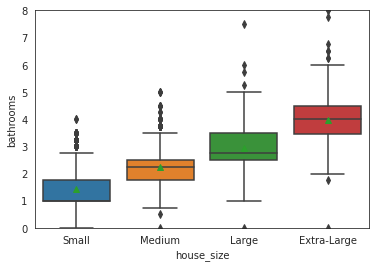

In [ ]:
#boxplot of house_size vs. bathrooms
# We chose the median because we see that the data is skewed with numerous outliers outside the interquartile range. 
# For this reason, we think it is best not to use mean as it may not be as good of a model predictor. 
# Therefore, we will impute the median values into the missing values for small, medium, large, extra large.
# We will also use median for bedrooms as it also contains outliers that skew the mean. 
sns.boxplot(x=df['house_size'],y=df['bathrooms'], data=df, showmeans=True)
plt.ylim(0,8)

In [ ]:
#Show rows where the number of bathrooms is 0. Not plausible, possibly data entry errors
questionable = df[df.bathrooms == 0]
questionable


,id,date,price,bedrooms,bathrooms,sqft_living,house_size,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0.0,0.0,3064.0,Large,4764.0,3.5,0,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
1149,3421079032,20150217T000000,75000.0,1.0,0.0,670.0,Small,43377.0,1.0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
3119,3918400017,20150205T000000,380000.0,NaN,0.0,1470.0,Small,979.0,3.0,0,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
5832,5702500050,20141104T000000,280000.0,1.0,0.0,600.0,Small,24501.0,1.0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
6994,2954400190,20140624T000000,1295650.0,0.0,0.0,4810.0,Extra-Large,28008.0,2.0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
9773,3374500520,20150429T000000,355000.0,0.0,0.0,2460.0,Medium,8049.0,2.0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000.0,0.0,0.0,1470.0,Small,4800.0,2.0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
19452,3980300371,20140926T000000,142000.0,NaN,0.0,290.0,Small,20875.0,1.0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


In [ ]:
#Drop the 8 rows containing 0 bathrooms
for row in questionable.index:
    df = df.drop([row])

In [ ]:
#Show rows where the number of bedrooms is 0 (not a house)
questionable1 = df[df.bedrooms == 0]
questionable1

,id,date,price,bedrooms,bathrooms,sqft_living,house_size,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3467,1453602309,20140805T000000,288000.0,0.0,NaN,1430.0,Small,1650.0,3.0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,Small,5900.0,1.0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
8477,2569500210,20141117T000000,339950.0,0.0,2.50,2290.0,Medium,8319.0,2.0,0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,20140925T000000,240000.0,0.0,2.50,1810.0,Medium,5669.0,2.0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
12653,7849202299,20150218T000000,320000.0,0.0,2.50,1490.0,Small,7111.0,2.0,0,...,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675
14423,9543000205,20150413T000000,139950.0,0.0,NaN,844.0,Small,4269.0,1.0,0,...,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,Small,213444.0,1.0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341


In [ ]:
#Drop rows where the number of bedrooms is 0
for row in questionable1.index:
    df = df.drop([row])

In [ ]:
#Show rows where the number of bedrooms >10
questionable2 = df[df.bedrooms > 10]
questionable2

,id,date,price,bedrooms,bathrooms,sqft_living,house_size,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33.0,1.75,1620.0,Medium,6000.0,1.0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [ ]:
#Drop row where bedrooms >10
for row in questionable2.index:
    df = df.drop([row])

In [ ]:
#Drop sqft_lot > 250,000 and price > 3mil
questionable3 = df[df.sqft_lot > 250000]
for row in questionable3.index:
  df = df.drop([row])
questionable4 = df[df.price > 3000000]
for row in questionable4.index:
  df = df.drop([row])

In [ ]:
#new column 'age' and 'age_since_renovation' added
df['age'] = 2022 - df.yr_built
df['age_since_renovation'] = 2022 - df.yr_renovated
df

,id,date,price,bedrooms,bathrooms,sqft_living,house_size,sqft_lot,floors,waterfront,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,age_since_renovation
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,Small,5650.0,1.0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,67,2022
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,Medium,7242.0,2.0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,71,31
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,Small,10000.0,1.0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,89,2022
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,Medium,5000.0,1.0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,57,2022
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,Medium,8080.0,1.0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,35,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530.0,Medium,1131.0,3.0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,13,2022
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,Medium,5813.0,2.0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,8,2022
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020.0,Small,1350.0,2.0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,13,2022
21611,291310100,20150116T000000,400000.0,3.0,2.50,1600.0,Medium,2388.0,2.0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,18,2022


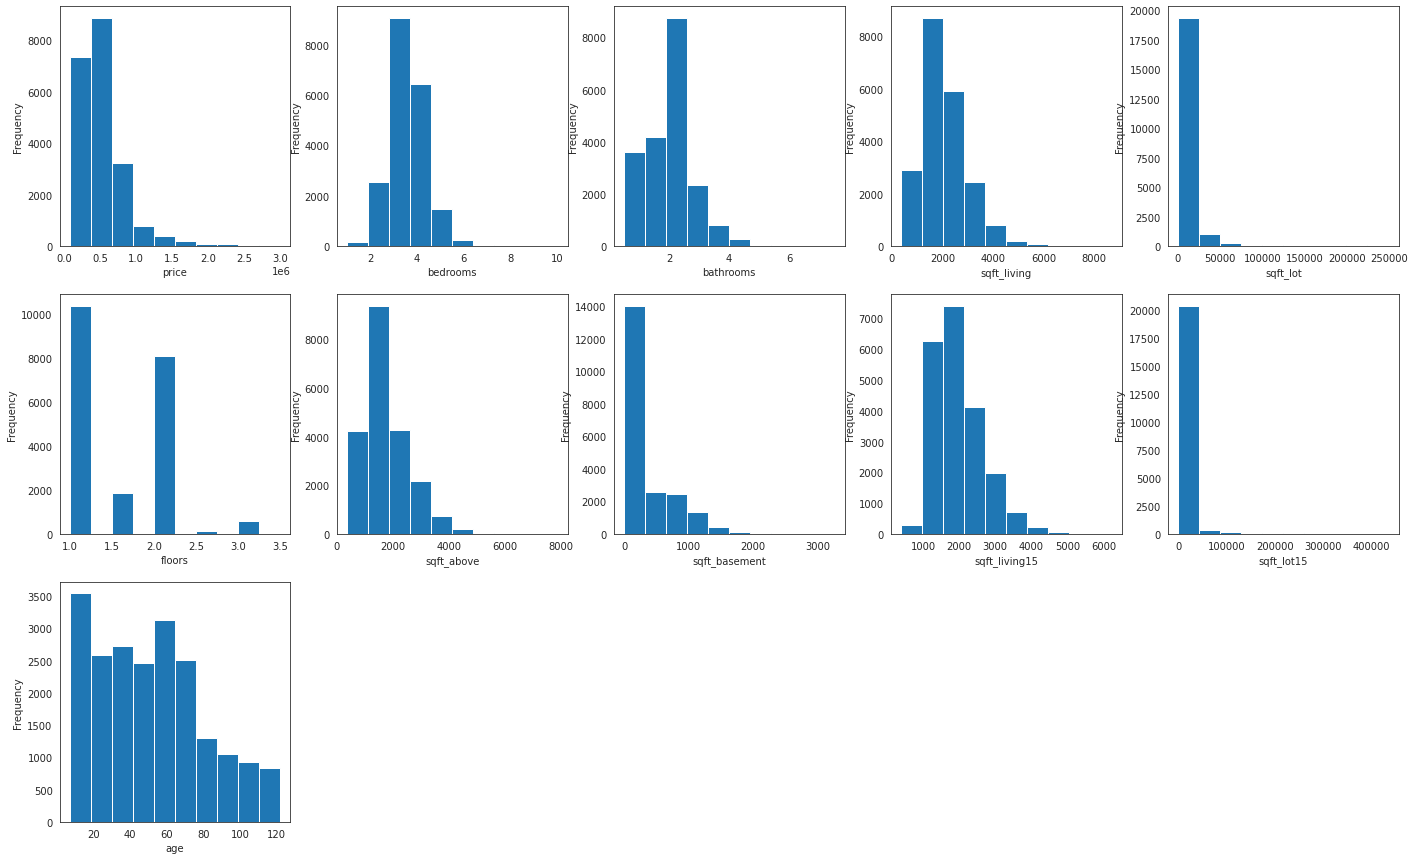

In [ ]:
#histograms after outliers are dropped
numeric_vars =  ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','sqft_living15','sqft_lot15','age']
# create histograms for each numeric variable
fig = plt.figure(figsize=(24, 15))
for i in range(len(numeric_vars)):
    var = numeric_vars[i]
    sub = fig.add_subplot(3, 5, i + 1)
    sub.set_xlabel(var)
    df[var].plot(kind = 'hist')
    

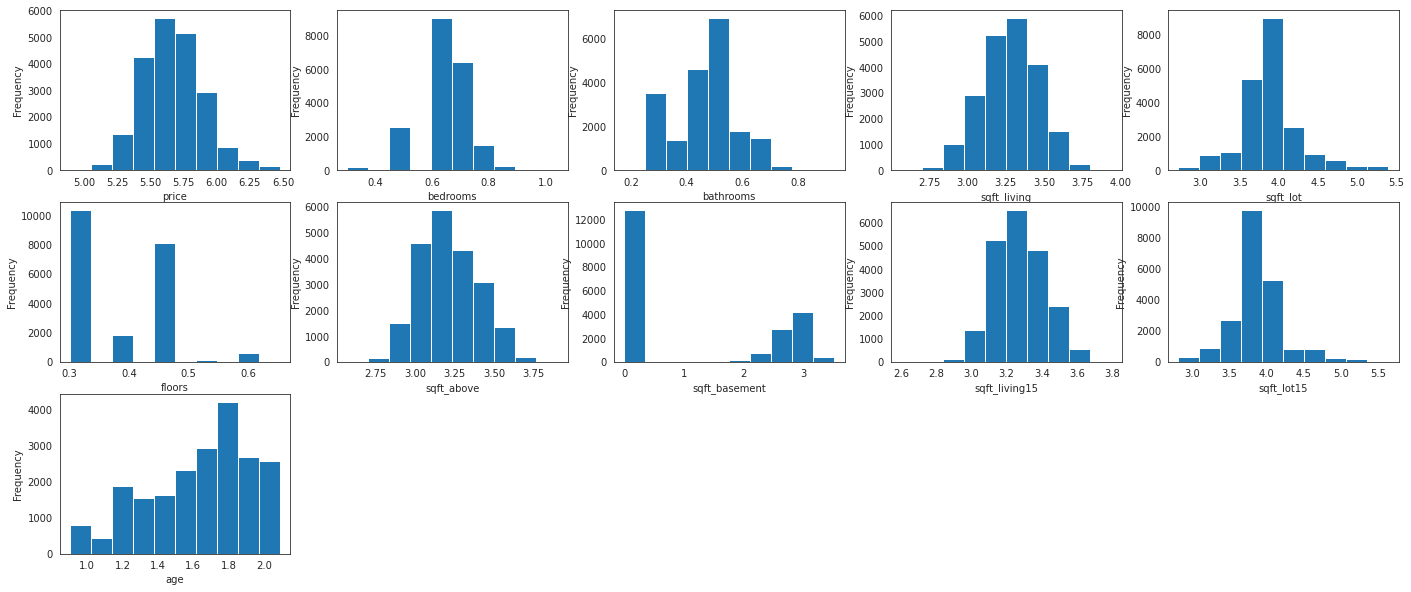

In [ ]:
# Setting up the list to loop through for the log transformation creating 11 different plots.
log_var = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','sqft_living15','sqft_lot15','age']
fig = plt.figure(figsize = (24,10))

# Log transformation loop to normalize the data. 
for j in range(len(log_var)):
  var = log_var[j]
  transformed = "log_" + var
  df[transformed] = np.log10(df[var]+1)
  sub = fig.add_subplot(3, 5, j + 1)
  sub.set_xlabel(var)
  df[transformed].plot(kind = 'hist')

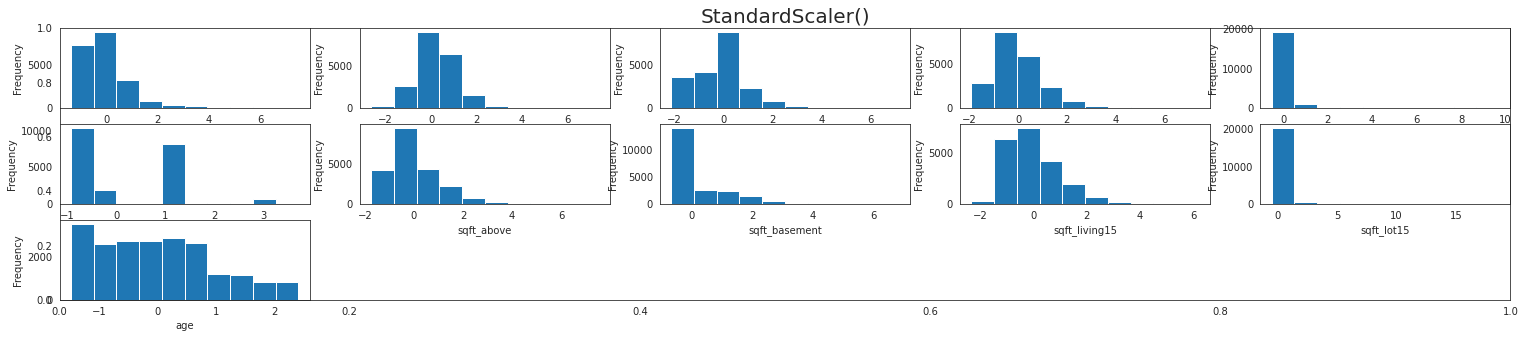

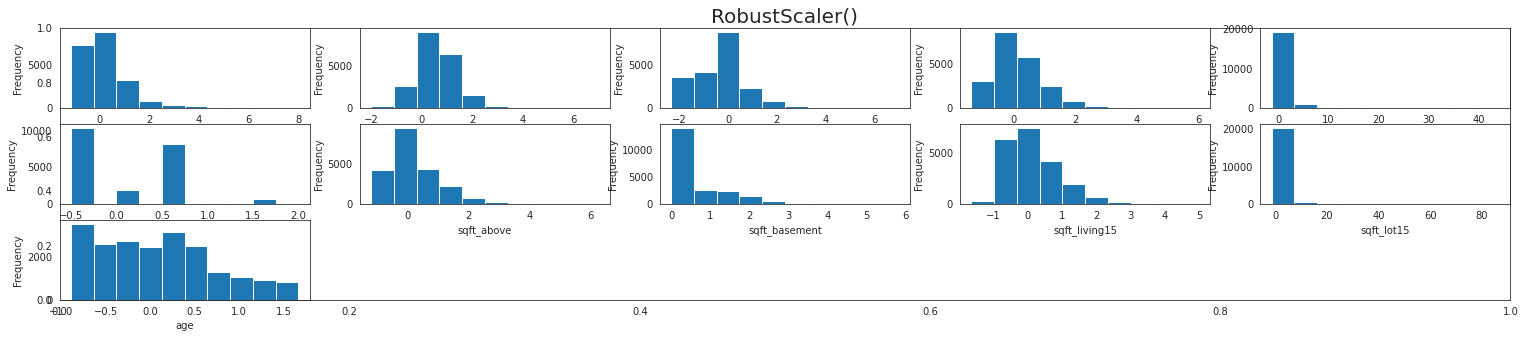

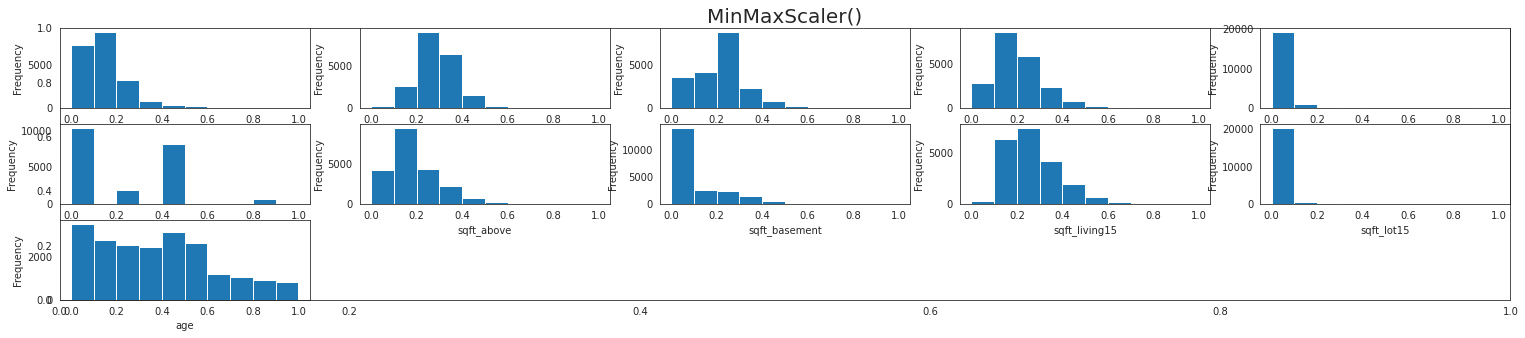

In [ ]:
# Sets up three different scaler methods for visualization and comparison.
scale_var = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','sqft_living15','sqft_lot15','age']
scalers_list = [StandardScaler(), RobustScaler(), MinMaxScaler()]
for i in range(len(scalers_list)):
    scaler = scalers_list[i]
    fig = plt.figure(figsize = (26, 5))
    plt.title(scaler, fontsize = 20)
    for j in range(len(scale_var)):
        var = scale_var[j]
        scaled_var = "scaled_" + var
        model = scaler.fit(df[var].values.reshape(-1,1))
        df[scaled_var] = model.transform(df[var].values.reshape(-1, 1))
        sub = fig.add_subplot(3, 5, j + 1)
        sub.set_xlabel(var)
        df[scaled_var].plot(kind = 'hist')


In [ ]:
#Create dummy variables for each category of condition
df_dummy_cond=df.copy()
df_dummy_cond = pd.get_dummies(df_dummy_cond, columns=['condition'], prefix = ['condition'])

print(df_dummy_cond.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0       3.0       1.00       1180.0   
1  6414100192  20141209T000000  538000.0       3.0       2.25       2570.0   
2  5631500400  20150225T000000  180000.0       2.0       1.00        770.0   
3  2487200875  20141209T000000  604000.0       4.0       3.00       1960.0   
4  1954400510  20150218T000000  510000.0       3.0       2.00       1680.0   

  house_size  sqft_lot  floors  waterfront  ...  scaled_sqft_above  \
0      Small    5650.0     1.0           0  ...           0.107856   
1     Medium    7242.0     2.0           0  ...           0.239680   
2      Small   10000.0     1.0           0  ...           0.053262   
3     Medium    5000.0     1.0           0  ...           0.090546   
4     Medium    8080.0     1.0           0  ...           0.174434   

   scaled_sqft_basement  scaled_sqft_living15  scaled_sqft_lot15  scaled_age  \
0              0.000000       

In [ ]:
#Create dummy variables for each category of grade
df_dummy_cond_grade=df_dummy_cond.copy()
df_dummy_cond_grade= pd.get_dummies(df_dummy_cond_grade, columns=['grade'], prefix = ['grade'])

print(df_dummy_cond_grade.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0       3.0       1.00       1180.0   
1  6414100192  20141209T000000  538000.0       3.0       2.25       2570.0   
2  5631500400  20150225T000000  180000.0       2.0       1.00        770.0   
3  2487200875  20141209T000000  604000.0       4.0       3.00       1960.0   
4  1954400510  20150218T000000  510000.0       3.0       2.00       1680.0   

  house_size  sqft_lot  floors  waterfront  ...  grade_4  grade_5  grade_6  \
0      Small    5650.0     1.0           0  ...        0        0        0   
1     Medium    7242.0     2.0           0  ...        0        0        0   
2      Small   10000.0     1.0           0  ...        0        0        1   
3     Medium    5000.0     1.0           0  ...        0        0        0   
4     Medium    8080.0     1.0           0  ...        0        0        0   

   grade_7  grade_8  grade_9  grade_10  grade_11  grade_12  gr

In [ ]:
#Create final dataframe merging original dataframe with dummy variables for condition, grade, and zipcode
df_final=df_dummy_cond_grade.copy()
df_final= pd.get_dummies(df_final, columns=['zipcode'], prefix = ['zipcode'])

# Get price in million
df_final['price_in_million'] = (df_final['price'].astype(float)/1000000)
df_final['sqft_living_in_million'] = (df_final['sqft_living'].astype(float)/1000000)
df_final['sqft_lot_in_million'] = (df_final['sqft_lot'].astype(float)/1000000)
df_final['sqft_above_in_million'] = (df_final['sqft_above'].astype(float)/1000000)
df_final['sqft_basement_in_million'] = (df_final['sqft_basement'].astype(float)/1000000)

print(df_final.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0       3.0       1.00       1180.0   
1  6414100192  20141209T000000  538000.0       3.0       2.25       2570.0   
2  5631500400  20150225T000000  180000.0       2.0       1.00        770.0   
3  2487200875  20141209T000000  604000.0       4.0       3.00       1960.0   
4  1954400510  20150218T000000  510000.0       3.0       2.00       1680.0   

  house_size  sqft_lot  floors  waterfront  ...  zipcode_98177  zipcode_98178  \
0      Small    5650.0     1.0           0  ...              0              1   
1     Medium    7242.0     2.0           0  ...              0              0   
2      Small   10000.0     1.0           0  ...              0              0   
3     Medium    5000.0     1.0           0  ...              0              0   
4     Medium    8080.0     1.0           0  ...              0              0   

   zipcode_98188  zipcode_98198  zipcode_981

In [ ]:
#Use the median number of bedrooms for each house size category to impute for null values for that category
df_final['bedrooms'] = df_final.groupby('house_size')['bedrooms'].transform(
    lambda grp: grp.fillna(round((stats.median(grp)),0))
)


In [ ]:
##Use the median number of bathrooms for each house size category to impute for null values for that category
df_final['bathrooms'] = df_final.groupby('house_size')['bathrooms'].transform(
    lambda grp: grp.fillna(round((stats.median(grp)),2))
)

In [ ]:
#Checking to see that the median bedroom/bathroom has been imputed 
df_final.iloc[[18,24]]

,id,date,price,bedrooms,bathrooms,sqft_living,house_size,sqft_lot,floors,waterfront,...,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,price_in_million,sqft_living_in_million,sqft_lot_in_million,sqft_above_in_million,sqft_basement_in_million
18,16000397,20141205T000000,189000.0,3.0,1.00,1200.0,Small,9850.0,1.0,0,...,0,0,0,0,0,0.189,0.00120,0.00985,0.00120,0.0
24,3814700200,20141120T000000,329000.0,3.0,2.88,2450.0,Medium,6500.0,2.0,0,...,0,0,0,0,0,0.329,0.00245,0.00650,0.00245,0.0


In [ ]:
df_final.isnull().sum()

id                          0
date                        0
price                       0
bedrooms                    0
bathrooms                   0
                           ..
price_in_million            0
sqft_living_in_million      0
sqft_lot_in_million         0
sqft_above_in_million       0
sqft_basement_in_million    0
Length: 134, dtype: int64

(array([2.906e+03, 8.700e+03, 5.916e+03, 2.446e+03, 8.170e+02, 1.960e+02,
        8.000e+01, 2.100e+01, 1.000e+01, 3.000e+00]),
 array([ 370., 1200., 2030., 2860., 3690., 4520., 5350., 6180., 7010.,
        7840., 8670.]),
 <a list of 10 Patch objects>)

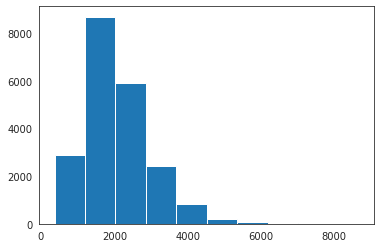

In [ ]:
plt.hist(df['sqft_living'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


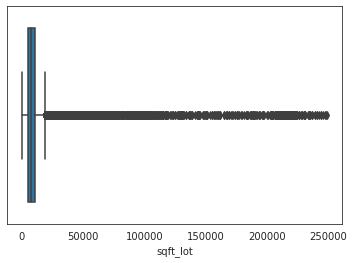

In [ ]:
sns.boxplot(df['sqft_lot'])

In [ ]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,scaled_bedrooms,scaled_bathrooms,scaled_sqft_living,scaled_sqft_lot,scaled_floors,scaled_sqft_above,scaled_sqft_basement,scaled_sqft_living15,scaled_sqft_lot15,scaled_age
id,1.000000,-0.023018,0.003103,0.001429,-0.012312,-0.149299,0.018433,-0.003711,0.013440,-0.024704,...,0.003103,0.001429,-0.012312,-0.149299,0.018433,-0.009830,-0.006833,-0.004174,-0.137081,-0.021667
price,-0.023018,1.000000,0.325938,0.517749,0.689614,0.099518,0.266654,0.205735,0.379689,0.038481,...,0.325938,0.517749,0.689614,0.099518,0.266654,0.593924,0.302090,0.599641,0.077301,-0.045752
bedrooms,0.003103,0.325938,1.000000,0.529242,0.600525,0.058617,0.183882,-0.015223,0.078997,0.021196,...,1.000000,0.529242,0.600525,0.058617,0.183882,0.495489,0.305175,0.407813,0.039115,-0.163334
bathrooms,0.001429,0.517749,0.529242,1.000000,0.747850,0.098635,0.504603,0.042759,0.165329,-0.135548,...,0.529242,1.000000,0.747850,0.098635,0.504603,0.676436,0.267833,0.564608,0.079416,-0.512871
sqft_living,-0.012312,0.689614,0.600525,0.747850,1.000000,0.214934,0.352999,0.066103,0.261251,-0.064889,...,0.600525,0.747850,1.000000,0.214934,0.352999,0.872439,0.417233,0.758887,0.181867,-0.320192
sqft_lot,-0.149299,0.099518,0.058617,0.098635,0.214934,1.000000,-0.024671,0.029046,0.050868,-0.010798,...,0.058617,0.098635,0.214934,1.000000,-0.024671,0.225037,0.019908,0.215035,0.808289,-0.066226
floors,0.018433,0.266654,0.183882,0.504603,0.352999,-0.024671,1.000000,0.021409,0.021700,-0.271125,...,0.183882,0.504603,0.352999,-0.024671,1.000000,0.524368,-0.255117,0.276857,-0.022606,-0.490391
waterfront,-0.003711,0.205735,-0.015223,0.042759,0.066103,0.029046,0.021409,1.000000,0.386312,0.015630,...,-0.015223,0.042759,0.066103,0.029046,0.021409,0.044310,0.052426,0.066740,0.037612,0.032360
view,0.013440,0.379689,0.078997,0.165329,0.261251,0.050868,0.021700,0.386312,1.000000,0.043314,...,0.078997,0.165329,0.261251,0.050868,0.021700,0.144806,0.263566,0.266457,0.051092,0.062928
condition,-0.024704,0.038481,0.021196,-0.135548,-0.064889,-0.010798,-0.271125,0.015630,0.043314,1.000000,...,0.021196,-0.135548,-0.064889,-0.010798,-0.271125,-0.166796,0.177818,-0.098155,0.001020,0.368055


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


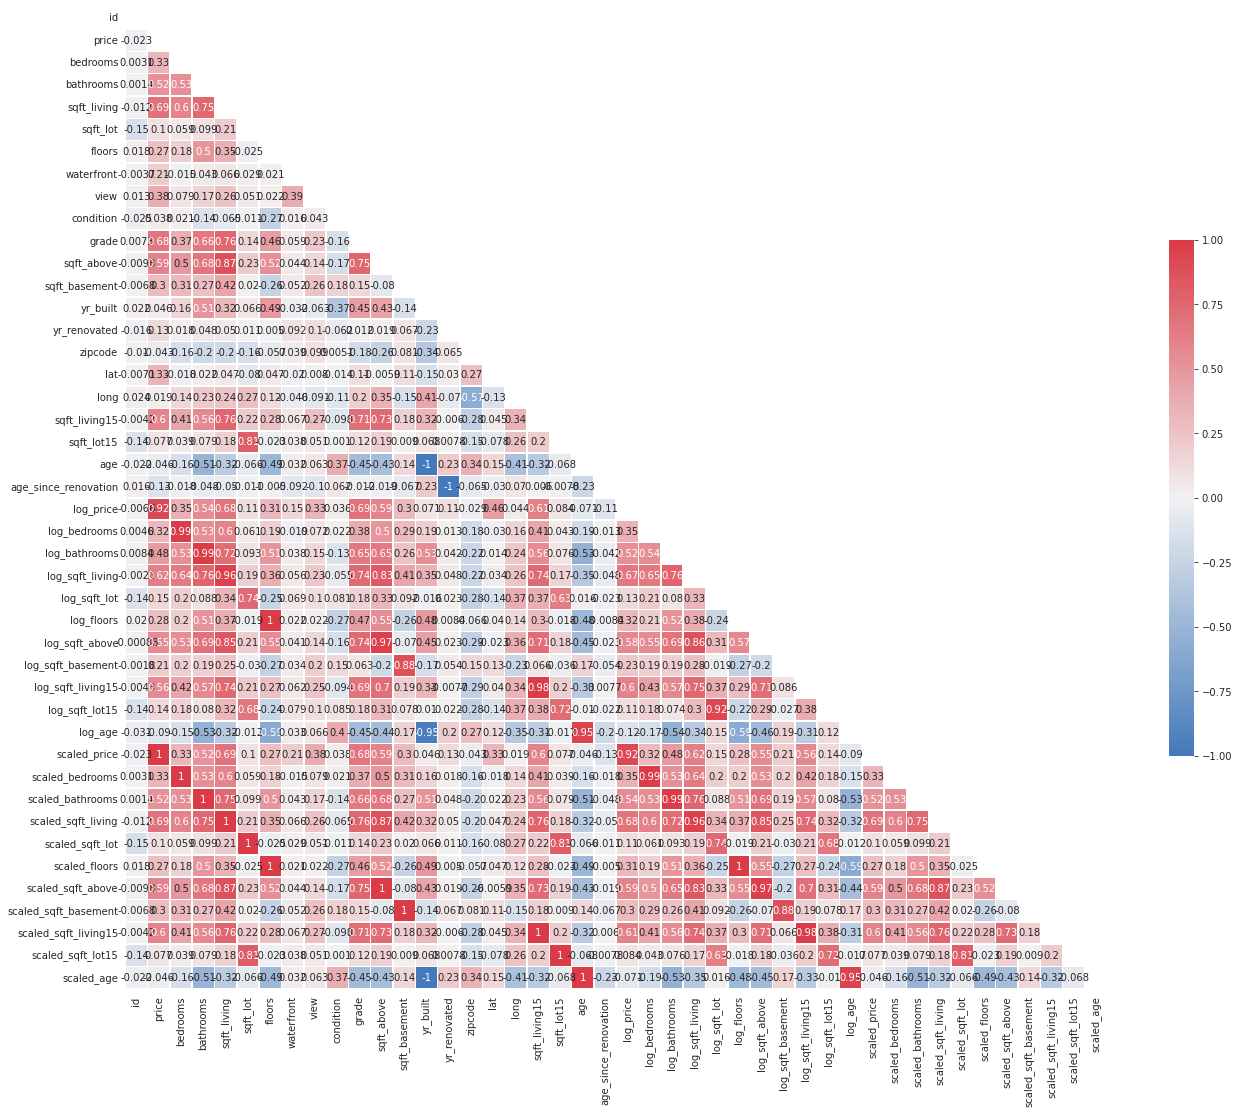

In [ ]:
#correlation matrix w/ duplicates dropped
def CorrMtx(df, dropDuplicates = True):

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(22, 19))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True)
        
dfMatrix = df.corr()
CorrMtx(dfMatrix, True)

In [ ]:
df.dtypes

id                         int64
date                      object
price                    float64
bedrooms                 float64
bathrooms                float64
sqft_living              float64
house_size              category
sqft_lot                 float64
floors                   float64
waterfront                 int64
view                       int64
condition                  int64
grade                      int64
sqft_above                 int64
sqft_basement              int64
yr_built                   int64
yr_renovated               int64
zipcode                    int64
lat                      float64
long                     float64
sqft_living15              int64
sqft_lot15                 int64
age                        int64
age_since_renovation       int64
geometry                geometry
dtype: object

In [ ]:
# import map of King County, Washington
county_map=gpd.read_file("/content/Community_Service_Areas_with_Subarea_Details_in_King_County___community_service_detail_area.shp", driver="shapefile")

In [ ]:
# designate coordinate system
crs = {'init' : 'espc:4326'} 
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
# create GeoPandas dataframe, with new 'geometry' column added
geo_df = gpd.GeoDataFrame(df,
  geometry=geometry)

geo_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,house_size,sqft_lot,floors,waterfront,...,scaled_bathrooms,scaled_sqft_living,scaled_sqft_lot,scaled_floors,scaled_sqft_above,scaled_sqft_basement,scaled_sqft_living15,scaled_sqft_lot15,scaled_age,geometry
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,Small,5650.0,1.0,0,...,0.071429,0.097590,0.020635,0.0,0.107856,0.000000,0.161934,0.011516,0.521739,POINT (-122.25700 47.51120)
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,Medium,7242.0,2.0,0,...,0.250000,0.265060,0.027039,0.4,0.239680,0.122699,0.222165,0.016099,0.556522,POINT (-122.31900 47.72100)
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,Small,10000.0,1.0,0,...,0.071429,0.048193,0.038133,0.0,0.053262,0.000000,0.399415,0.017073,0.713043,POINT (-122.23300 47.73790)
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,Medium,5000.0,1.0,0,...,0.357143,0.191566,0.018020,0.0,0.090546,0.279141,0.165376,0.010019,0.434783,POINT (-122.39300 47.52080)
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,Medium,8080.0,1.0,0,...,0.214286,0.157831,0.030410,0.0,0.174434,0.000000,0.241094,0.015785,0.243478,POINT (-122.04500 47.61680)


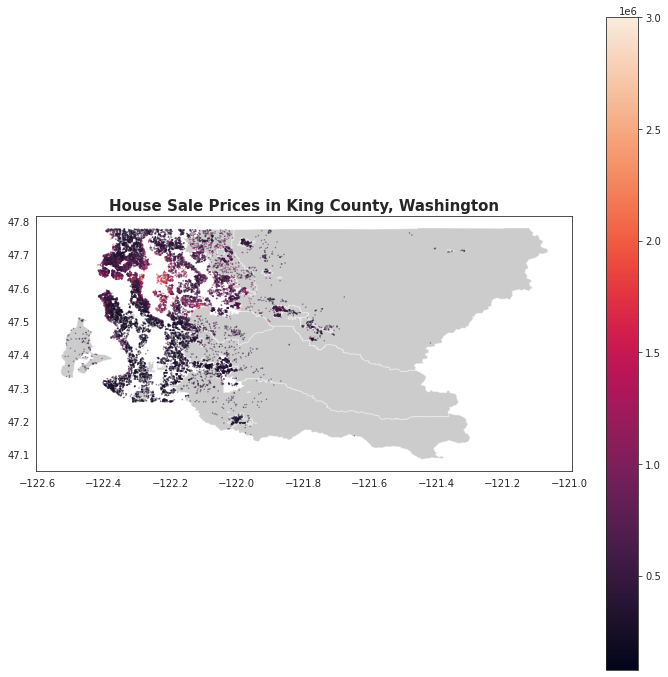

In [ ]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(12,12))
# add .shp mapfile to axes
county_map.plot(ax=ax, alpha=0.4,color='gray')
# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(column='price',ax=ax,alpha=0.5, legend=True,markersize=0.25)
# add title to graph
plt.title('House Sale Prices in King County, Washington', fontsize=15,fontweight='bold')
# show map
plt.show()

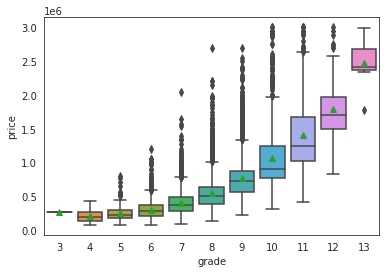

In [ ]:
sns.boxplot(x=df['grade'],y=df['price'], data=df, showmeans=True)


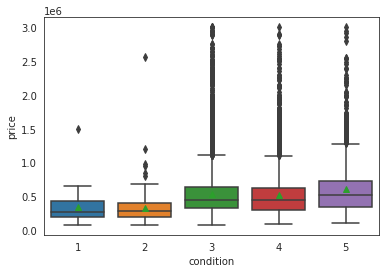

In [ ]:
sns.boxplot(x=df['condition'],y=df['price'], data=df, showmeans=True)

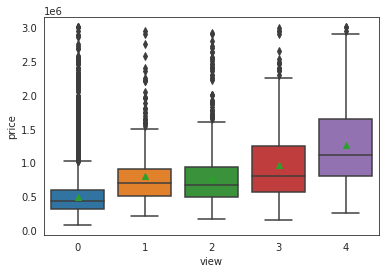

In [ ]:
sns.boxplot(x=df_final['view'],y=df_final['price'], data=df_final, showmeans=True)

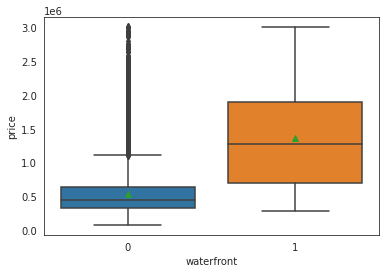

In [ ]:
sns.boxplot(x=df_final['waterfront'],y=df_final['price'], data=df_final, showmeans=True)

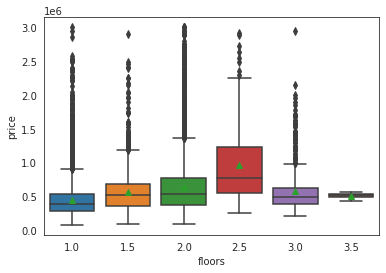

In [ ]:
sns.boxplot(x=df_final['floors'],y=df_final['price'], data=df_final, showmeans=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

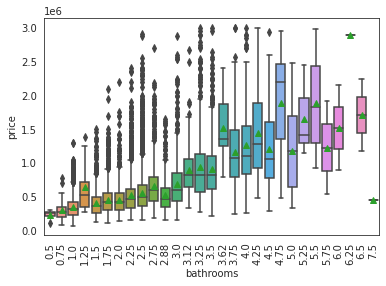

In [ ]:
sns.boxplot(x=df_final['bathrooms'],y=df_final['price'], data=df_final, showmeans=True)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

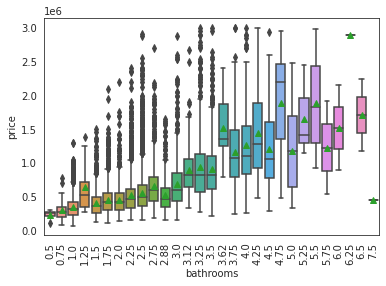

In [ ]:
sns.boxplot(x=df_final['bathrooms'],y=df_final['price'], data=df_final, showmeans=True)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

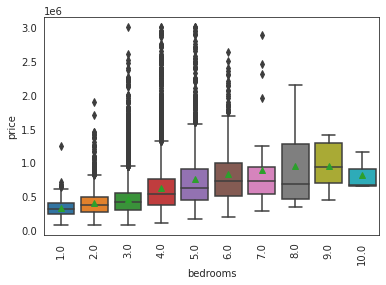

In [ ]:
sns.boxplot(x=df_final['bedrooms'],y=df_final['price'], data=df_final, showmeans=True)
plt.xticks(rotation=90)

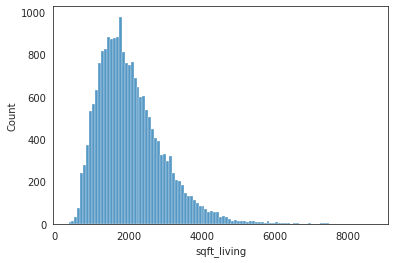

In [ ]:
sns.histplot(data=df_final, x='sqft_living')

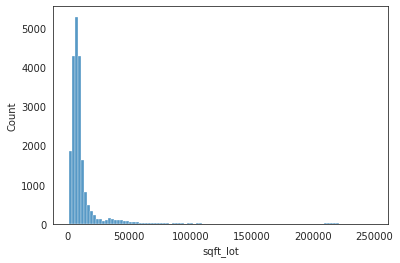

In [ ]:
sns.histplot(data=df_final, x='sqft_lot',bins=100)

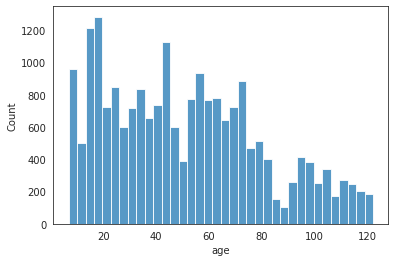

In [ ]:
sns.histplot(data=df_final, x='age')

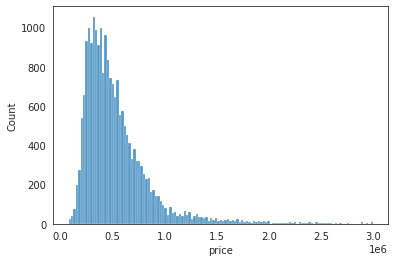

In [ ]:
sns.histplot(data=df_final, x='price')

In [ ]:
df_final.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,...,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,price_in_million,sqft_living_in_million,sqft_lot_in_million,sqft_above_in_million,sqft_basement_in_million
id,1.000000,-0.023018,0.000727,0.005030,-0.012312,-0.149299,0.018433,-0.003711,0.013440,-0.009830,...,-0.024746,-0.012765,-0.003091,0.022526,-0.050237,-0.023018,-0.012312,-0.149299,-0.009830,-0.006833
price,-0.023018,1.000000,0.334223,0.510340,0.689614,0.099518,0.266654,0.205735,0.379689,0.593924,...,0.043918,-0.074160,-0.059199,-0.079095,0.093534,1.000000,0.689614,0.099518,0.593924,0.302090
bedrooms,0.000727,0.334223,1.000000,0.528365,0.605726,0.064901,0.185724,-0.010345,0.085271,0.500291,...,0.003144,-0.009241,0.003978,-0.026850,-0.019188,0.334223,0.605726,0.064901,0.500291,0.305109
bathrooms,0.005030,0.510340,0.528365,1.000000,0.745005,0.098939,0.485934,0.038792,0.166848,0.670881,...,-0.000730,-0.048277,-0.024415,-0.048370,0.006293,0.510340,0.745005,0.098939,0.670881,0.271960
sqft_living,-0.012312,0.689614,0.605726,0.745005,1.000000,0.214934,0.352999,0.066103,0.261251,0.872439,...,0.029959,-0.040804,-0.023691,-0.040871,0.010244,0.689614,1.000000,0.214934,0.872439,0.417233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
price_in_million,-0.023018,1.000000,0.334223,0.510340,0.689614,0.099518,0.266654,0.205735,0.379689,0.593924,...,0.043918,-0.074160,-0.059199,-0.079095,0.093534,1.000000,0.689614,0.099518,0.593924,0.302090
sqft_living_in_million,-0.012312,0.689614,0.605726,0.745005,1.000000,0.214934,0.352999,0.066103,0.261251,0.872439,...,0.029959,-0.040804,-0.023691,-0.040871,0.010244,0.689614,1.000000,0.214934,0.872439,0.417233
sqft_lot_in_million,-0.149299,0.099518,0.064901,0.098939,0.214934,1.000000,-0.024671,0.029046,0.050868,0.225037,...,-0.005105,-0.021291,-0.009753,-0.011577,-0.038389,0.099518,0.214934,1.000000,0.225037,0.019908
sqft_above_in_million,-0.009830,0.593924,0.500291,0.670881,0.872439,0.225037,0.524368,0.044310,0.144806,1.000000,...,0.006176,-0.061290,-0.028535,-0.042731,-0.030954,0.593924,0.872439,0.225037,1.000000,-0.080140


In [ ]:
df_final.isnull().sum()

id                          0
date                        0
price                       0
bedrooms                    0
bathrooms                   0
                           ..
price_in_million            0
sqft_living_in_million      0
sqft_lot_in_million         0
sqft_above_in_million       0
sqft_basement_in_million    0
Length: 134, dtype: int64

In [ ]:
# Writing model #1
X = df_final[['bedrooms',
 'bathrooms',
 'sqft_living_in_million',
 'sqft_lot_in_million',
 'floors',
 'waterfront',
 'view',
 'sqft_basement_in_million',
 'age_since_renovation',
 'age',
 'condition_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13',
 'zipcode_98001',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98105',
 'zipcode_98106',
 'zipcode_98107',
 'zipcode_98108',
 'zipcode_98109',
 'zipcode_98112',
 'zipcode_98115',
 'zipcode_98116',
 'zipcode_98117',
 'zipcode_98118',
 'zipcode_98119',
 'zipcode_98122',
 'zipcode_98125',
 'zipcode_98126',
 'zipcode_98133',
 'zipcode_98136',
 'zipcode_98144',
 'zipcode_98146',
 'zipcode_98148',
 'zipcode_98155',
 'zipcode_98166',
 'zipcode_98168',
 'zipcode_98177',
 'zipcode_98178',
 'zipcode_98188',
 'zipcode_98198',
 'zipcode_98199']] 
y = df_final[['price_in_million']]
X = sm.add_constant(X) 
est = sm.OLS(y, X).fit() 
est.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       price_in_million   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1171.
Date:                Sat, 13 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:26:22   Log-Likelihood:                 12719.
No. Observations:               21095   AIC:                        -2.525e+04
Df Residuals:                   21001   BIC:                        -2.450e+04
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.3570      0.013     26.920      0.000       0.331       0.383
bedrooms                    -0.0069      0.001     -5.050      0.000      -0.010      -0.004
bathrooms                    0.0206      0.002      9.632      0.000       0.016       0.025
sqft_living_in_million     153.3634      2.510     61.096      0.000     148.443     158.284
sqft_lot_in_million          0.3038      0.043      7.065      0.000       0.219       0.388
floors                      -0.0260      0.003     -9.760      0.000      -0.031      -0.021
waterfront                   0.4741      0.012     38.144      0.000       0.450       0.498
view                         0.0554      0.001     37.906      0.000       0.052       0.058
sqft_basement_in_million   -51.0406      3.093    -16.500      0.000     -57.104     -44.977
age_since_renovation     -2.742e-05   2.47e-06    -11.107      0.000   -3.23e-05   -2.26e-05
age                          0.0003   5.49e-05      5.615      0.000       0.000       0.000
condition_1                 -0.0232      0.022     -1.073      0.283      -0.066       0.019
condition_2                  0.0606      0.010      5.889      0.000       0.040       0.081
condition_3                  0.0742      0.005     13.529      0.000       0.063       0.085
condition_4                  0.0994      0.006     17.608      0.000       0.088       0.110
condition_5                  0.1461      0.006     23.654      0.000       0.134       0.158
grade_3                     -0.0717      0.122     -0.588      0.557      -0.311       0.167
grade_4                     -0.1906      0.027     -7.124      0.000      -0.243      -0.138
grade_5                     -0.2334      0.015    -15.331      0.000      -0.263      -0.204
grade_6                     -0.2305      0.013    -17.726      0.000      -0.256      -0.205
grade_7                     -0.2185      0.013    -17.322      0.000      -0.243      -0.194
grade_8                     -0.1853      0.013    -14.753      0.000      -0.210      -0.161
grade_9                     -0.0971      0.013     -7.658      0.000      -0.122      -0.072
grade_10                     0.0345      0.013      2.631      0.009       0.009       0.060
grade_11                     0.2056      0.014     14.309      0.000       0.177       0.234
grade_12                     0.4312      0.020     21.515      0.000       0.392       0.471
grade_13                     0.9128      0.048     18.954      0.000       0.818       1.007
zipcode_98001               -0.1925      0.007    -27.188      0.000      -0.206      -0.179
zipcode_98002               -0.1886      0.010    -19.794      0.000      -0.207      -0.170
zipcode_98003               -0.1988      0.008    -24.725      0.000      -0.215      -0.183
zipcode_98004 

In [ ]:
X = df_final[['sqft_living_in_million',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13',
'bathrooms']]
y = df_final[['price_in_million']]
X = sm.add_constant(X) 
est = sm.OLS(y, X).fit() 
est.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       price_in_million   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     2231.
Date:                Sat, 13 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:34:21   Log-Likelihood:                 2146.0
No. Observations:               21095   AIC:                            -4266.
Df Residuals:                   21082   BIC:                            -4163.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.4574      0.021     21.608      0.000       0.416       0.499
sqft_living_in_million   145.4825      3.114     46.714      0.000     139.378     151.587
grade_3                   -0.2612      0.201     -1.302      0.193      -0.655       0.132
grade_4                   -0.3324      0.044     -7.630      0.000      -0.418      -0.247
grade_5                   -0.3385      0.024    -13.888      0.000      -0.386      -0.291
grade_6                   -0.3105      0.021    -14.940      0.000      -0.351      -0.270
grade_7                   -0.2759      0.020    -13.645      0.000      -0.315      -0.236
grade_8                   -0.2017      0.020     -9.981      0.000      -0.241      -0.162
grade_9                   -0.0661      0.020     -3.235      0.001      -0.106      -0.026
grade_10                   0.1325      0.021      6.286      0.000       0.091       0.174
grade_11                   0.3687      0.023     15.969      0.000       0.323       0.414
grade_12                   0.6426      0.032     19.901      0.000       0.579       0.706
grade_13                   1.0999      0.079     13.958      0.000       0.945       1.254
bathrooms                 -0.0131      0.003     -4.241      0.000      -0.019      -0.007
==============================================================================
Omnibus:                     9080.308   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80312.550
Skew:                           1.845   Prob(JB):                         0.00
Kurtosis:                      11.818   Cond. No.                     3.71e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.58e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""